In [1]:
from pathlib import Path
from dclpatch.main import PatchProject

/home/ds/anaconda3/envs/DCLwidgets_clone/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
root_dir_path = Path('/mnt/c/Users/dsege/TEMP/Alexia/analysis_with_dcl_patch/')

In [3]:
api = PatchProject(root_dir = root_dir_path)

In [4]:
path_to_all_cell_recordings = Path('/mnt/c/Users/dsege/TEMP/Alexia/sample_data/')
api.add_all_cells_to_database(path_with_cell_recordings_as_subdirs = path_to_all_cell_recordings, overwrite=True)

In [5]:
df = api.database.excitatory_voltage_clamp_recordings.copy()

In [6]:
df.columns

Index(['global_cell_id', 'date', 'session_cell_id', 'mouse_line',
       'brain_region', 'cell_type', 'sex', 'age', 'stimulation_in_percent',
       'internal_solution', 'recording_type', 'stimulation_string',
       'stimulation_frequency-Hz', 'stimulation_duration-ms', 'pharmacology',
       'time_since_cutting-M', 'Cap I (pA)', 'Tau (ms)', 'Rs (MΩ)',
       'Cell Cap (pF)', 'Iinf(nA)', 'Rm (MΩ)', 'Access change (%)',
       'Total time (s)', 'Time of counting (s)', 'Nb of  sweeps',
       'Mean amp (pA)', 'Rise time 10-90 (ms)', 'Decay time 63% (ms)',
       'Half width (ms)', 'filepath_main_excel_sheet',
       'filepath_detected_events', 'Time of counting (s) '],
      dtype='object')

In [7]:
key = 'stimulation_duration-ms'
value = [200, 2000]

In [8]:
df.loc[(df[key].isin(value)) | (df[key].isnull())][key].unique()

array([  nan, 2000.,  200.])

In [9]:
df['stimulation_string'].unique()

array(['baseline', '4-Hz_for_1000-ms', '20-Hz_for_100-ms',
       '20-Hz_for_500-ms', '4-Hz_for_5000-ms', '4-Hz_for_2000-ms',
       '20-Hz_for_200-ms', 'control_baseline'], dtype=object)

In [10]:
inclusion_criteria = {'stimulation_string': ['baseline', '4-Hz_for_2000-ms', '20-Hz_for_200-ms']}


--> ['NET-cre:vGat-flp', 'NET-ires-cre:vGat-flp']

You might consider adding all but one to the exclusion criteria!
_______________________________________

--> ['Female', 'Male']

You might consider adding all but one to the exclusion criteria!
_______________________________________

--> ['Kglu + 1.73ug bio', 'Kglu + 1ug bio', 'CsMe']

You might consider adding all but one to the exclusion criteria!
_______________________________________


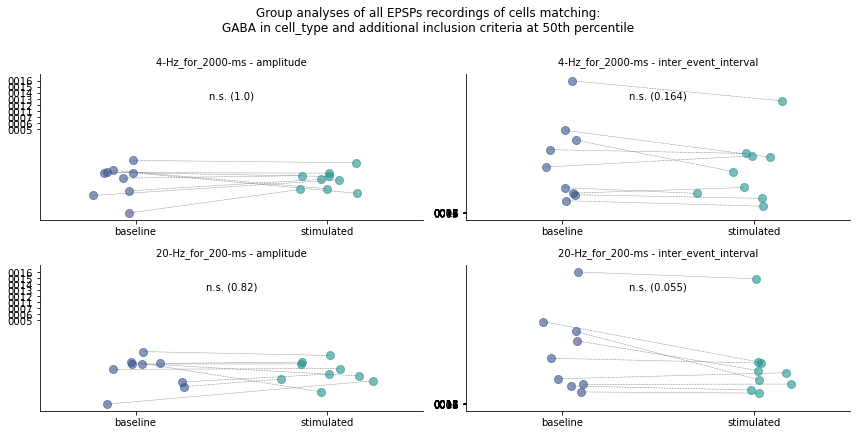

In [11]:
#exclusion_criteria = {'internal_solution': 'Kglu = bio', 'internal_solution': 'Kglu + 1.78ug bio'}
#inclusion_criteria = {'cell_type': 'Glutamatergic'}
dataset = api.compare_within_group(group_column = 'cell_type', group_id = 'GABA', analysis_type = 'CDF@50', recording_type = 'EPSPs', include = inclusion_criteria)

In [10]:
dataset.keys()

dict_keys(['4-Hz_for_1000-ms', '20-Hz_for_100-ms', '4-Hz_for_2000-ms', '20-Hz_for_200-ms'])

In [11]:
dataset[]

{'amplitude': {'baseline': [-7.396280000000001, -8.67289],
  'stimulated': [-6.19072, -7.45901],
  'global_cell_id': ['0000', '0001']},
 'inter_event_interval': {'baseline': [315.7333333333336, 1306.0083333333332],
  'stimulated': [312.6000000000001, 717.3166666666664],
  'global_cell_id': ['0000', '0001']}}

In [ ]:
data group_id subject_id measurement_type

data condition cell_id measurement

In [12]:
stimulation_key = '4-Hz_for_1000-ms'

In [ ]:
single_stimulation_type_data = {'data': list(),
                                'stimulation_type': list(),
                                'global_cell_id': list(),
                                'measurement': list()}

for measurement in dataset[stimulation_key].keys():
    single_stimulation_type_data['data'] += dataset[stimulation_key]['stimulated']
    single_stimulation_type_data['data'] += dataset[stimulation_key]['baseline']
    single_stimulation_type_data['data'] += 
    
    

In [1]:
api.save_database()

NameError: name 'api' is not defined

# Code development

In [15]:
import pandas as pd

In [1]:
from dclpatch.analysis import CDFAnalysis

In [8]:
cdf_analysis = CDFAnalysis(database = api.database, df_to_use = api.database.excitatory_voltage_clamp_recordings, recording_type = 'EPSPs')

In [9]:
cdf_analysis.group_column = 'cell_type'

In [10]:
cdf_analysis.group_id = 'Glutamatergic'

In [11]:
filepaths = cdf_analysis.get_all_recording_filepaths()

In [13]:
for recording_filepath in filepaths:
    cdf_analysis.get_data_for_cumulative_distributions(filepath = recording_filepath)

In [16]:
df_all_events = pd.DataFrame(data=cdf_analysis.events_all_stim_paradigms)
df_all_events

,global_cell_id,stimulation_string,amplitude,inter_event_interval,sweep
0,0000,baseline,-18.76700,NaN,0
1,0000,baseline,-12.01080,NaN,0
2,0000,baseline,-6.19985,223.166667,0
3,0000,baseline,-8.21860,166.033333,0
4,0000,baseline,-5.97182,274.283333,0
...,...,...,...,...,...
3442,0007,20-Hz_for_200-ms,-6.12733,95.566667,5
3443,0007,20-Hz_for_200-ms,-24.10140,190.866667,5
3444,0007,20-Hz_for_200-ms,-34.68450,228.566667,5
3445,0007,20-Hz_for_200-ms,-14.76840,237.100000,5


In [37]:
data = df_all_events.copy()

In [38]:
stim_paradigms = list(data['stimulation_string'].unique())
stim_paradigms.remove('baseline')

probability_to_compare = 50
measurements = ['amplitude', 'inter_event_interval']

percentile_data_per_stim_string = dict()
stim_paradigms = list(df_all_events['stimulation_string'].unique())
stim_paradigms.remove('baseline')
for stim_string in stim_paradigms:
    percentile_data_per_stim_string[stim_string] = dict()
    for measurement in measurements:
        percentile_data_per_stim_string[stim_string][measurement] = {'baseline': list(),
                                                                     'stimulated': list()}
        for global_cell_id in df_all_events.loc[df_all_events['stimulation_string'] == stim_string, 'global_cell_id'].unique():
            baseline = np.nanpercentile(df_all_events.loc[(df_all_events['stimulation_string'] == 'baseline') &
                                                          (df_all_events['global_cell_id'] == global_cell_id), measurement].values,
                                        probability_to_compare)
            stimulated = np.nanpercentile(df_all_events.loc[(df_all_events['stimulation_string'] == stim_string) &
                                                            (df_all_events['global_cell_id'] == global_cell_id), measurement].values,
                                          probability_to_compare)
            
            percentile_data_per_stim_string[stim_string][measurement]['baseline'] += [baseline]
            percentile_data_per_stim_string[stim_string][measurement]['stimulated'] += [stimulated]




In [39]:
stim_paradigms

['4-Hz_for_1000-ms',
 '20-Hz_for_100-ms',
 '4-Hz_for_2000-ms',
 '20-Hz_for_200-ms']

In [40]:
for stim_string in stim_paradigms:
    df_temp = data.loc[data['stimulation_string'].isin([stim_string, 'baseline'])]
    #for column_name in columns_for_cdfs:

In [43]:
df_temp

,global_cell_id,stimulation_string,amplitude,inter_event_interval,sweep
0,0000,baseline,-18.76700,NaN,0
1,0000,baseline,-12.01080,NaN,0
2,0000,baseline,-6.19985,223.166667,0
3,0000,baseline,-8.21860,166.033333,0
4,0000,baseline,-5.97182,274.283333,0
...,...,...,...,...,...
3442,0007,20-Hz_for_200-ms,-6.12733,95.566667,5
3443,0007,20-Hz_for_200-ms,-24.10140,190.866667,5
3444,0007,20-Hz_for_200-ms,-34.68450,228.566667,5
3445,0007,20-Hz_for_200-ms,-14.76840,237.100000,5


In [60]:
data

,global_cell_id,stimulation_string,amplitude,inter_event_interval,sweep
0,0000,baseline,-18.76700,NaN,0
1,0000,baseline,-12.01080,NaN,0
2,0000,baseline,-6.19985,223.166667,0
3,0000,baseline,-8.21860,166.033333,0
4,0000,baseline,-5.97182,274.283333,0
...,...,...,...,...,...
3442,0007,20-Hz_for_200-ms,-6.12733,95.566667,5
3443,0007,20-Hz_for_200-ms,-24.10140,190.866667,5
3444,0007,20-Hz_for_200-ms,-34.68450,228.566667,5
3445,0007,20-Hz_for_200-ms,-14.76840,237.100000,5


In [84]:
a = np.array([[np.nan, 7., 4.], [3., 2., 1.]])

np.nanpercentile(a, 50)



3.0

In [65]:
df_all_events.loc[(df_all_events['stimulation_string'] == stim_string) & (df_all_events['global_cell_id'] == global_cell_id), 'amplitude'].values

array([], dtype=float64)

In [185]:
df_all_events

,global_cell_id,stimulation_string,amplitude,inter_event_interval,sweep
0,0000,baseline,-18.76700,NaN,0
1,0000,baseline,-12.01080,NaN,0
2,0000,baseline,-6.19985,223.166667,0
3,0000,baseline,-8.21860,166.033333,0
4,0000,baseline,-5.97182,274.283333,0
...,...,...,...,...,...
3442,0007,20-Hz_for_200-ms,-6.12733,95.566667,5
3443,0007,20-Hz_for_200-ms,-24.10140,190.866667,5
3444,0007,20-Hz_for_200-ms,-34.68450,228.566667,5
3445,0007,20-Hz_for_200-ms,-14.76840,237.100000,5


In [183]:
probability_to_compare = 50
measurements = ['amplitude', 'inter_event_interval']

percentile_data_per_stim_string = dict()
stim_paradigms = list(df_all_events['stimulation_string'].unique())
stim_paradigms.remove('baseline')
for stim_string in stim_paradigms:
    percentile_data_per_stim_string[stim_string] = dict()
    for measurement in measurements:
        percentile_data_per_stim_string[stim_string][measurement] = {'baseline': list(),
                                                                     'stimulated': list()}
        for global_cell_id in df_all_events.loc[df_all_events['stimulation_string'] == stim_string, 'global_cell_id'].unique():
            baseline = np.nanpercentile(df_all_events.loc[(df_all_events['stimulation_string'] == 'baseline') &
                                                          (df_all_events['global_cell_id'] == global_cell_id), measurement].values,
                                        probability_to_compare)
            stimulated = np.nanpercentile(df_all_events.loc[(df_all_events['stimulation_string'] == stim_string) &
                                                            (df_all_events['global_cell_id'] == global_cell_id), measurement].values,
                                          probability_to_compare)
            
            percentile_data_per_stim_string[stim_string][measurement]['baseline'] += [baseline]
            percentile_data_per_stim_string[stim_string][measurement]['stimulated'] += [stimulated]

In [194]:
df = pd.DataFrame(data=percentile_data_per_stim_string['4-Hz_for_1000-ms']['amplitude'])
df.shape

(2, 2)

In [192]:
stats = pg.wilcoxon(x=df['baseline'], y=df['stimulated'])

stats['p-val']['Wilcoxon']

0.5

In [189]:
for stimulation_type in percentile_data_per_stim_string.keys():
    for measurement in percentile_data_per_stim_string[stimulation_type].keys():
        

dict_keys(['4-Hz_for_1000-ms', '20-Hz_for_100-ms', '4-Hz_for_2000-ms', '20-Hz_for_200-ms'])

In [187]:
percentile_data_per_stim_string['4-Hz_for_1000-ms']

{'amplitude': {'baseline': [-7.396280000000001, -8.67289],
  'stimulated': [-6.19072, -7.45901]},
 'inter_event_interval': {'baseline': [315.7333333333336, 1306.0083333333332],
  'stimulated': [312.6000000000001, 717.3166666666664]}}

In [195]:
n_rows = 2
lala = ['hund', 'katze']

for animal, row_index in zip(lala, range(n_rows)):
    print(animal, row_index)

hund 0
katze 1


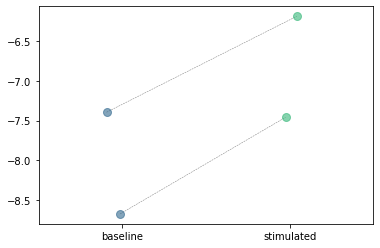

In [181]:
jitter = 0.1
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter += np.arange(len(df.columns))

colormixer = plt.cm.viridis(np.linspace(0, 1, len(df.columns) + 2))
colormixer = colormixer[1 : -1]

fig, ax = plt.subplots()
for index in range(len(df.columns)):
    column = df.columns[index]
    color = colormixer[index]
    ax.plot(df_x_jitter[column], df[column], 'o', color=color, alpha=.60, zorder=1, ms=8, mew=1)
ax.set_xticks(range(2))
ax.set_xticklabels(['baseline', 'stimulated'])
ax.set_xlim(-0.5,2-0.5)

for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['baseline','stimulated']], df.loc[idx,['baseline','stimulated']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)

In [182]:
percentile_data_per_stim_string.keys()

dict_keys(['4-Hz_for_1000-ms', '20-Hz_for_100-ms', '4-Hz_for_2000-ms', '20-Hz_for_200-ms'])

In [86]:
e_l = []
e_l += [global_cell_id]
e_l

['0007']

In [ ]:
global_cell_id, baseline, stimulated, stimulation_string

In [87]:
df_all_events.loc[df_all_events['stimulation_string'] == stim_string, 'global_cell_id'].unique()

array(['0006', '0007'], dtype=object)

In [98]:
percentile_data_per_stim_string.keys()

dict_keys(['4-Hz_for_1000-ms', '20-Hz_for_100-ms', '4-Hz_for_2000-ms', '20-Hz_for_200-ms'])

In [102]:
percentile_data_per_stim_string['20-Hz_for_200-ms']

{'global_cell_id': ['0006', '0006', '0007', '0007'],
 'stimulation_string': ['baseline',
  '20-Hz_for_200-ms',
  'baseline',
  '20-Hz_for_200-ms'],
 'percentile_amplitude': [-6.94073, -7.33049, -16.9545, -7.674175],
 'percentile_inter_event_interval': [373.89999999999964,
  492.03333333333404,
  350.8000000000002,
  197.81666666666692]}

In [132]:
reorganized = {'baseline': df.loc[df['stimulation_string'] == 'baseline', 'percentile_amplitude'].values,
               'stimulated': df.loc[df['stimulation_string'] == '4-Hz_for_1000-ms', 'percentile_amplitude'].values}

In [133]:
df_reorganized = pd.DataFrame(data=reorganized)
df_reorganized

,baseline,stimulated
0,-7.39628,-6.19072
1,-8.67289,-7.45901


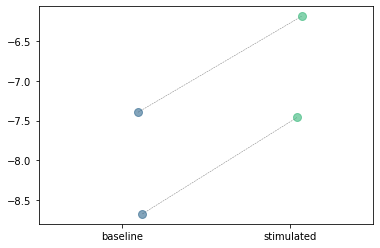

In [169]:
jitter = 0.1
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df_reorganized.values.shape), columns=df_reorganized.columns)
df_x_jitter += np.arange(len(df_reorganized.columns))

colormixer = plt.cm.viridis(np.linspace(0, 1, len(df_reorganized.columns) + 2))
colormixer = colormixer[1 : -1]

fig, ax = plt.subplots()
for index in range(len(df_reorganized.columns)):
    column = df_reorganized.columns[index]
    color = colormixer[index]
    ax.plot(df_x_jitter[column], df_reorganized[column], 'o', color=color, alpha=.60, zorder=1, ms=8, mew=1)
ax.set_xticks(range(2))
ax.set_xticklabels(['baseline', 'stimulated'])
ax.set_xlim(-0.5,2-0.5)

for idx in df_reorganized.index:
    ax.plot(df_x_jitter.loc[idx,['baseline','stimulated']], df_reorganized.loc[idx,['baseline','stimulated']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)

In [126]:
df

,global_cell_id,stimulation_string,percentile_amplitude,percentile_inter_event_interval
0,0000,baseline,-7.39628,315.733333
1,0000,4-Hz_for_1000-ms,-6.19072,312.600000
2,0001,baseline,-8.67289,1306.008333
3,0001,4-Hz_for_1000-ms,-7.45901,717.316667


In [105]:
df = pd.DataFrame(data=percentile_data_per_stim_string['4-Hz_for_1000-ms'])
df.sort_values(by=['stimulation_string', 'global_cell_id'])

,global_cell_id,stimulation_string,percentile_amplitude,percentile_inter_event_interval
1,0000,4-Hz_for_1000-ms,-6.19072,312.600000
3,0001,4-Hz_for_1000-ms,-7.45901,717.316667
0,0000,baseline,-7.39628,315.733333
2,0001,baseline,-8.67289,1306.008333


In [90]:
import pingouin as pg

/home/ds/anaconda3/envs/DCLwidgets_clone/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [124]:
df_x_jitter

,percentile_amplitude,percentile_inter_event_interval
0,0.032500,0.936994
1,-0.004802,0.946024
2,-0.040314,0.956480
3,0.068725,1.032449


In [110]:
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter += np.arange(len(df.columns))



In [125]:
df_x_jitter

,percentile_amplitude,percentile_inter_event_interval
0,0.032500,0.936994
1,-0.004802,0.946024
2,-0.040314,0.956480
3,0.068725,1.032449


KeyError: "None of [Index(['baseline', '4-Hz_for_1000-ms'], dtype='object')] are in the [index]"

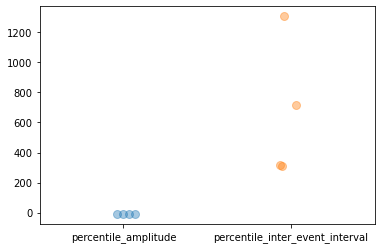

In [123]:


N=20
# dummy dataset
data = np.random.normal(size=(N,))

jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df[['percentile_amplitude', 'percentile_inter_event_interval']].values.shape), columns=['percentile_amplitude', 'percentile_inter_event_interval'])
df_x_jitter += np.arange(2)

fig, ax = plt.subplots()
for col in ['percentile_amplitude', 'percentile_inter_event_interval']:
    ax.plot(df_x_jitter[col], df[col], 'o', alpha=.40, zorder=1, ms=8, mew=1)
ax.set_xticks(range(2))
ax.set_xticklabels(['percentile_amplitude', 'percentile_inter_event_interval'])
ax.set_xlim(-0.5,2-0.5)

for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['baseline','4-Hz_for_1000-ms']], df.loc[idx,['baseline','4-Hz_for_1000-ms']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)

In [97]:
pg.wilcoxon(x=df.loc[df['stimulation_string'] == 'baseline', 'percentile_amplitude'].values, 
            y=df.loc[df['stimulation_string'] == '4-Hz_for_1000-ms', 'percentile_amplitude'].values)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.5,-1.0,0.25


In [ ]:
global_cell_id, stimulation_string, percentile_amplitude, percentile_inter_event_interval

In [67]:
percentile_values

{'0000': {'baseline': -7.396280000000001,
  '4-Hz_for_1000-ms': -6.19072,
  '20-Hz_for_100-ms': -7.4271650000000005},
 '0001': {'baseline': -8.67289,
  '4-Hz_for_1000-ms': -7.45901,
  '20-Hz_for_100-ms': -11.4995},
 '0006': {'baseline': -6.94073,
  '4-Hz_for_2000-ms': -5.989545,
  '20-Hz_for_200-ms': -7.33049},
 '0007': {'baseline': -16.9545,
  '4-Hz_for_2000-ms': -12.2297,
  '20-Hz_for_200-ms': -7.674175}}

In [54]:
import matplotlib.pyplot as plt

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    for percentile in [10, 20, 30, 40, 50, 60, 90]:
        plt.vlines(np.percentile(a, percentile), ymin=0, ymax=1, color='red')
        plt.hlines(percentile/100, min(a), max(a), color='red')
    plt.grid(True)
    plt.show()
    #plt.savefig('ecdf.png')

In [55]:
import numpy as np

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]



In [56]:
a = df_all_events.loc[(df_all_events['stimulation_string'] == '4-Hz_for_1000-ms'), 'amplitude'].values

In [57]:
np.median(a)

-6.41832

In [58]:
np.percentile(a, 0)

-33.7484

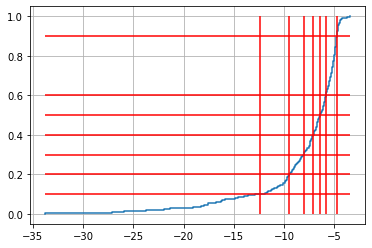

In [59]:
plot_ecdf(a = a)

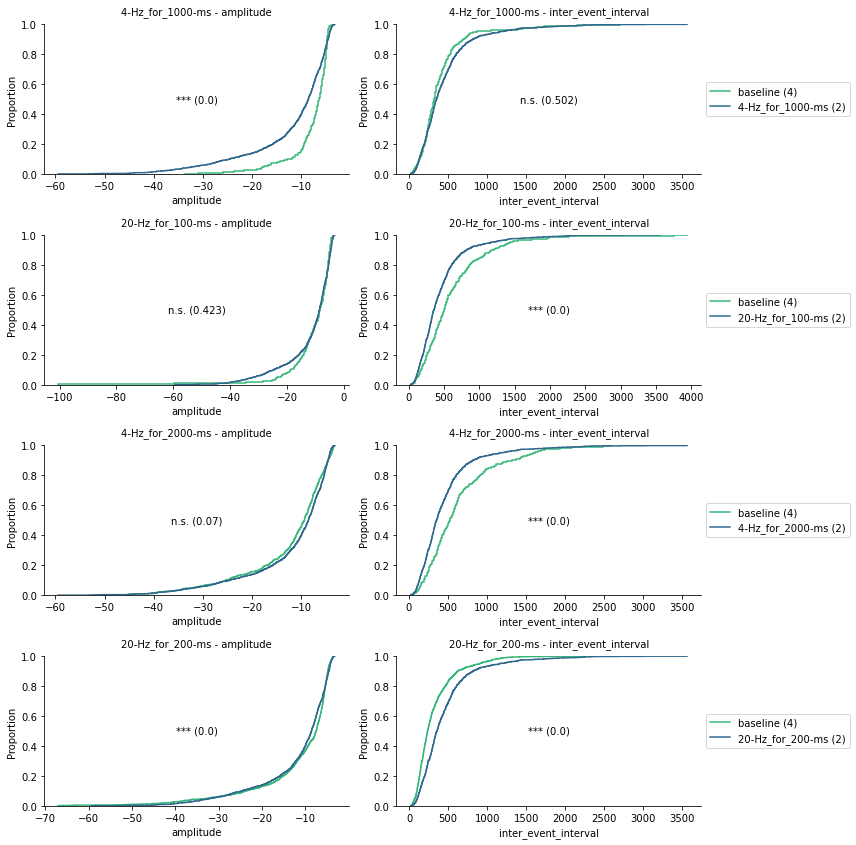

In [17]:
cdf_analysis.plot_cdfs(data = df_all_events,
                       columns_for_cdfs = ['amplitude', 'inter_event_interval'], 
                       show = True,
                       save = False)

In [7]:
api.database.excitatory_voltage_clamp_recordings

,global_cell_id,date,session_cell_id,mouse_line,brain_region,cell_type,sex,age,stimulation_in_percent,internal_solution,...,Total time (s),Time of counting (s),Nb of sweeps,Mean amp (pA),Rise time 10-90 (ms),Decay time 63% (ms),Half width (ms),filepath_main_excel_sheet,filepath_detected_events,Time of counting (s)
0,0000,2021_11_16,C3,NET-cre:vGlut2-flp,vlPAG,Glutamatergic,Male,145,20,Kglu + 1ug bio,...,135.45,19.35,7,8.74,1.13,2.56,4.86,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,NaN
1,0000,2021_11_16,C3,NET-cre:vGlut2-flp,vlPAG,Glutamatergic,Male,145,20,Kglu + 1ug bio,...,132,16.5,8,7.21,2.07,3.52,6.46,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,NaN
2,0000,2021_11_16,C3,NET-cre:vGlut2-flp,vlPAG,Glutamatergic,Male,145,20,Kglu + 1ug bio,...,137.6,17.2,8,8.71,1.67,3.2,5.88,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,NaN
3,0001,2021_11_17,C3,NET-ires-cre:vGlut2-flp,vlPAG,Glutamatergic,Male,145,15,Kglu = bio,...,77.4,19.35,4,9.9,0.72,1.03,2.08,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,NaN
4,0001,2021_11_17,C3,NET-ires-cre:vGlut2-flp,vlPAG,Glutamatergic,Male,145,15,Kglu = bio,...,66,16.5,4,8.6,1.2,1.57,3.31,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,NaN
5,0001,2021_11_17,C3,NET-ires-cre:vGlut2-flp,vlPAG,Glutamatergic,Male,145,15,Kglu = bio,...,137.6,17.2,8,13.11,1.2,2.6,5.05,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,NaN
6,0002,2021_12_09,C2,NET-cre:vGat-flp,vlPAG,GABA,Female,147,15,Kglu + 1.73ug bio,...,272,NaN,8,8.59,0.82,1.85,3.66,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,34
7,0002,2021_12_09,C2,NET-cre:vGat-flp,vlPAG,GABA,Female,147,15,Kglu + 1.73ug bio,...,270,NaN,10,8.38,1.25,1.98,3.93,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,27
8,0002,2021_12_09,C2,NET-cre:vGat-flp,vlPAG,GABA,Female,147,15,Kglu + 1.73ug bio,...,313,NaN,10,8.71,1.21,1.71,3.56,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,31.3
9,0002,2021_12_09,C2,NET-cre:vGat-flp,vlPAG,GABA,Female,147,15,Kglu + 1.73ug bio,...,222.6,NaN,7,7.75,1.36,2.22,4.32,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,/mnt/c/Users/dsege/TEMP/Alexia/sample_data/202...,31.8


In [ ]:
api.database.excitatory_voltage_clamp_recordings.columns

In [ ]:
import pandas as pd

In [ ]:
include = {'cell_type': 'GABA'}

In [ ]:
exclude = {'session_cell_id': 'C3'}

In [ ]:
def apply_inclusion_criteria(df: DataFrame, inclusion_criteria: Dict) -> DataFrame:
    chunks_of_df_to_include = []
    for key, value in inclusion_criteria.items():
        if key not in df.columns:
            raise ValueError(f'{key} has to be in columns of the DataFrame. Please find a list of all possible columns: {list(df.columns)}')
        else:
            if type(value) == str:
                chunks_of_df_to_include.append(df.loc[df[key] == value].copy())
            else:
                raise ValueError(f'{value} is not a valid input! Only strings (e.g. "vlPAG") are possible, simply add a column multiple times with different values if needed.')
    df_after_inclusions = pd.concat(chunks_of_df_to_include, ignore_index = True)
    df_after_inclusions = df_after_inclusions.drop_duplicates(ignore_index = True)
    return df_after_inclusions

def apply_exclusion_criteria(df: DataFrame, exclusion_criteria: Dict) -> DataFrame:
    df_after_exclusions = df.copy()
    for key, value in exclusion_criteria.items():
        if key not in df.columns:
            raise ValueError(f'{key} has to be in columns of the DataFrame. Please find a list of all possible columns: {list(df.columns)}')
        else:
            if type(value) == str:
                df_after_exclusions = df_after_exclusions.loc[df_after_exclusions[key] != value]
            else:
                raise ValueError(f'{value} is not a valid input! Only strings (e.g. "vlPAG") are possible, simply add a column multiple times with different values if needed.')
    return df_after_exclusions


In [ ]:
4 % 4

In [ ]:
df_after_inclusions

In [ ]:
df['cell_type'].unique()

In [ ]:
import seaborn as sns

columns = list(df.columns)
relevant_columns = columns[columns.index('pharmacology') + 1 : columns.index('filepath_main_excel_sheet')]

for column in relevant_columns:
    sns.stripplot(data=df.loc[df['cell_type'] == 'GABA'], y = column, x = 'stimulation_string')

In [ ]:
def run_analysis(self, group_column: str, group_id: str, show: bool, save: bool):
    self.group_column = group_column
    self.group_id = group_id
    
    
    
    filepaths = self.get_all_recording_filepaths()
    for recording_filepath in filepaths:
        self.get_data_for_cumulative_distributions(filepath = recording_filepath)
    df_all_events = pd.DataFrame(data=self.events_all_stim_paradigms)
    self.plot_cdfs(data = df_all_events,
                   columns_for_cdfs = ['amplitude', 'inter_event_interval'], 
                   show = show,
                   save = save)

In [ ]:
name = '.2021_12_09_C2'

In [ ]:
if name.startswith('.') == False:
    print('no_hidden_file')

In [ ]:
[3] * 5 + [7]

In [ ]:
relevant_columns1 = ['recording_type','pharmacology', 'filepath_main_excel_sheet', 'filepath_detected_events']
relevant_columns2 = ['stimulation_string', 'stimulation_frequency-Hz', 'stimulation_duration-ms']

relevant_columns1 + relevant_columns2

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
import datetime

In [ ]:
path = Path('/mnt/c/Users/dsege/TEMP/Alexia/NET-cre_vGat-flp/2021_12_09_C2/')

In [ ]:
test = pd.read_excel('/mnt/c/Users/dsege/TEMP/Alexia/NET-cre_vGat-flp/2021_12_09_C2/2021_12_09_C2.xlsx', sheet_name = None)

In [ ]:
input_df = test['Recordings and cell properties']

In [ ]:
'stimulation_string', 'stimulation_frequency-Hz', 'stimulation_duration-ms', 'filepath_detected_events'

In [ ]:
input_df.columns = input_df.iloc[1]
input_df = input_df.iloc[2:, 1:]
input_df = input_df.loc[input_df['Type of protocol'].notnull()]

columns = list(input_df.columns)
relevant_data_columns = columns[columns.index('Pharmacology') +1 :]

all_final_single_stimulation_dfs = []
for row_index in range(input_df.shape[0]):
    single_stimulation_df = input_df.iloc[[row_index]].copy()
    if type(single_stimulation_df['Time since cutting'].iloc[0]) == datetime.time:
        time_since_cutting = single_stimulation_df['Time since cutting'].iloc[0].hour * 60 + single_stimulation_df['Time since cutting'].iloc[0].minute
    else:
        time_since_cutting = 'not_available'

    if single_stimulation_df['Vh (mV)'].iloc[0] == -70:
        postsynaptic_current_type = 'excitatory'
    elif single_stimulation_df['Vh (mV)'].iloc[0] == 0:
        postsynaptic_current_type = 'inhibitory'
    else:
        raise ValueError(f'{single_stimulation_df["Vh (mV)"].iloc[0]} is not a valid entry for holding potential!')

    if pd.isna(single_stimulation_df['Pharmacology'].iloc[0]):
        pharmacology = 'none'
    else:
        pharmacology = single_stimulation_df['Pharmacology'].iloc[0]

    if single_stimulation_df['Type of protocol'].iloc[0] == 'Bsl':
        stimulation_frequency = np.NaN
        stimulation_duration = np.NaN
        stimulation_string = 'baseline'
        # filepath?
    elif single_stimulation_df['Type of protocol'].iloc[0] == 'Bsl2':
        stimulation_frequency = np.NaN
        stimulation_duration = np.NaN
        stimulation_string = 'control_baseline'
        # filepath?
    elif 'Hz' in single_stimulation_df['Type of protocol'].iloc[0]:
        stimulation_frequency = single_stimulation_df['Type of protocol'].iloc[0].replace(' Hz', '')
        stimulation_duration = int(single_stimulation_df['Timing of stim (s)'].iloc[0] * 1000)
        stimulation_string = f'{stimulation_frequency}-Hz_for_{stimulation_duration}-ms'
        # filepath


    sorted_data = {'postsynaptic_current_type': [postsynaptic_current_type],
                   'stimulation_string': [stimulation_string],
                   'stimulation_frequency-Hz': [stimulation_frequency],
                   'stimulation_duration-ms': [stimulation_duration],
                   'pharmacology': [pharmacology],
                   'time_since_cutting-M': [time_since_cutting]}

    sorted_single_stimulation_df = pd.DataFrame(data = sorted_data)
    remaining_data_df = single_stimulation_df[relevant_data_columns].copy()
    remaining_data_df = remaining_data_df.reset_index(drop=True)
    all_final_single_stimulation_dfs.append(pd.concat([sorted_single_stimulation_df, remaining_data_df], axis=1))
recording_specific_dataframe = pd.concat(all_final_single_stimulation_dfs)
final_df = pd.concat([general_metadata_df, recording_specific_dataframe], axis=1)
final_df.insert(0, 'global_cell_id', [global_cell_id]*final_df.shape[0])

In [ ]:
metadata_df = test['General information']
general_metadata = {'date': path.name[:10],
                    'session_cell_id': path.name[path.name.rfind('_') + 1:],
                    'mouse_line': metadata_df['Animal line'][0],
                    'brain_region': metadata_df['Region'][0],
                    'cell_type': metadata_df['Type'][0],
                    'sex': metadata_df['Sex'][0],
                    'age': metadata_df['Age (days)'][0],
                    'stimulation_in_percent': metadata_df['Stimulation (%)'][0],
                    'internal_patch_solution': metadata_df['Internal used'][0]}
general_metadata_df = pd.DataFrame(general_metadata, index=[0])

In [ ]:
general_metadata_df = pd.DataFrame([general_metadata]*3)
general_metadata_df

In [ ]:
list(general_metadata_df['date'].values)

In [ ]:
global_cell_id = '0000'

In [ ]:
final_df = pd.concat([general_metadata_df, recording_specific_dataframe], axis=1)
final_df.insert(0, 'global_cell_id', [global_cell_id]*final_df.shape[0])

In [ ]:
a = {'hund': 'dog', 
     'katze': 'cat'}

for key, value in a.items():
    print(key, value)

In [ ]:
pd.concat([final_df, final_df])

In [ ]:
time_since_cutting = single_stimulation_df['Time since cutting'].iloc[0].hour * 60 + single_stimulation_df['Time since cutting'].iloc[0].minute

In [ ]:

remaining_data_df

In [ ]:
single_stimulation_df[data_columns]

In [ ]:
import datetime
isinstance(time_since_cutting, datetime.time)

In [ ]:
tmp_str = tmp_str.replace(' Hz', '')
tmp_str

In [ ]:
'stimulation_string', 'stimulation_frequency-Hz', 'stimulation_duration-ms', 'filepath_detected_events'

In [ ]:
database = api.database

In [ ]:
database.__dict__.keys()

In [ ]:
database.subdirectories

In [ ]:
df = api.database.cell_recordings_metadata

In [ ]:
df['sex'].unique().shape[0]

In [ ]:
list(df.loc[df['sex'] == 'Female', 'global_cell_id'].unique())

In [ ]:
import os

In [ ]:
os.path.isdir('/mnt/c/Users/dsege/TEMP/Alexia/analysis_with_dcl_patch/')

In [ ]:
p = Path('/mnt/c/Users/dsege/TEMP/Alexia/analysis_with_dcl_patch/')

In [ ]:
p.joinpath('results/')

In [ ]:
import os
from pathlib import Path
from typing import Dict

import pandas as pd
import numpy as np

In [ ]:
def get_general_metadata_df(path_to_recordings_dir: Path) -> pd.DataFrame:
    metadata_df = pd.read_excel(path_to_recordings_dir.joinpath(f'{path_to_recordings_dir.name}.xlsx'),
                                sheet_name = 'General information')
    general_metadata = {'date': path_to_recordings_dir.name[:10],
                        'session_cell_id': path_to_recordings_dir.name[path_to_recordings_dir.name.rfind('_') + 1:],
                        'mouse_line': metadata_df['Animal line'][0],
                        'brain_region': metadata_df['Region'][0],
                        'cell_type': metadata_df['Type'][0],
                        'sex': metadata_df['Sex'][0]}
    return pd.DataFrame(general_metadata, index=[0])

In [ ]:
def get_stimulation_paradigms_df(path_to_recordings_dir: Path) -> pd.DataFrame:
    filepaths_stimulation_recordings = list()
    for elem in path_to_recordings_dir.iterdir():
        if 'datapoints' not in elem.name:
            if elem.name.endswith('.csv'):
                filepaths_stimulation_recordings.append(elem)
    stimulation_paradigms = {'stimulation_string': list(),
                             'stimulation_frequency-Hz': list(),
                             'stimulation_duration-ms': list(), 
                             'filepath_detected_events': list()}
    for filepath in filepaths_stimulation_recordings:
        filename = filepath.name
        filename = filename.replace('.csv', '')
        yyyy_mm_dd_ = filename[:11]
        filename = filename.replace(yyyy_mm_dd_, '')
        cell_id = filename[:filename.index('_')]
        filename = filename.replace(cell_id + '_', '')
        if 'Hz' in filename:
            stimulation_frequency = int(filename[:filename.index('Hz')])
            stimulation_duration = filename[filename.index('Hz') + 2 :]
            if 'ms' not in stimulation_duration:
                stimulation_duration = int(stimulation_duration[:stimulation_duration.find('s')]) * 1000
            else:
                stimulation_duration = int(stimulation_duration[:stimulation_duration.find('ms')])
            stimulation_paradigm = f'{stimulation_frequency}-Hz_for_{stimulation_duration}-ms'
        elif 'Bsl' in filename:
            stimulation_frequency = np.NaN
            stimulation_duration = np.NaN
            stimulation_paradigm = 'baseline'
        else:
            print(f'Warning: stimulation paradigm could not be identified for: {filepath.name}')
            stimulation_frequency = np.NaN
            stimulation_duration = np.NaN
            stimulation_paradigm = 'unknown'
        stimulation_paradigms['stimulation_string'].append(stimulation_paradigm)
        stimulation_paradigms['stimulation_frequency-Hz'].append(stimulation_frequency)
        stimulation_paradigms['stimulation_duration-ms'].append(stimulation_duration)
        stimulation_paradigms['filepath_detected_events'].append(filepath)
    return pd.DataFrame(stimulation_paradigms)

In [ ]:
global_cell_id = 1

In [ ]:
str(global_cell_id).zfill(4)

In [ ]:
def get
    general_metadata = get_general_metadata_df(cell_recording_dir)
    stimulation_paradigms = get_stimulation_paradigms_df(cell_recording_dir)
    stimulations_adjusted_general_metadata = pd.concat([general_metadata]*stimulation_paradigms.shape[0], ignore_index=True)
    recordings_overview = pd.concat([stimulations_adjusted_general_metadata, stimulation_paradigms], axis=1)
    recordings_overview['global_cell_id'] = str(global_cell_id).zfill(4)


In [ ]:
columns = ['global_cell_id', 'date', 'session_cell_id', 'mouse_line', 'sex', 'brain_region', 'cell_type', 
           'stimulation_string', 'stimulation_frequency-Hz', 'stimulation_duration-ms', 'filepath_detected_events']

In [ ]:
recordings_overview[columns]

In [ ]:
recordings_overview

In [ ]:
stimulation_paradigms

In [ ]:
df_cell = pd.DataFrame(recording_info)

In [ ]:
df_cell

In [ ]:
cell_recording_dir = Path('/mnt/c/Users/dsege/TEMP/Alexia/NET-cre_vGat-flp/2021_12_09_C2/')



metadata_df = pd.read_excel(cell_recording_dir.joinpath(f'{cell_recording_dir.name}.xlsx'),
                            sheet_name = 'General information')

mix_and_matchable_categories = dict()

general_metadata = {'mouse_line': metadata_df['Animal line'][0],
                    'brain_region': metadata_df['Region'][0],
                    'cell_type': metadata_df['Type'][0],
                    'sex': metadata_df['Sex'][0]}

filepaths_stimulation_recordings = list()
for elem in cell_recording_dir.iterdir():
    if 'datapoints' not in elem.name:
        if elem.name.endswith('.csv'):
            filepaths_stimulation_recordings.append(elem)


stimulation_paradigms = dict()
for filepath in filepaths_stimulation_recordings:
    filename = filepath.name
    filename = filename.replace('.csv', '')
    yyyy_mm_dd_ = filename[:11]
    filename = filename.replace(yyyy_mm_dd_, '')
    cell_id = filename[:filename.index('_')]
    filename = filename.replace(cell_id + '_', '')
    if 'Hz' in filename:
        stimulation_frequency = filename[:filename.index('Hz') + 2]
        stimulation_duration = filename[filename.index('Hz') + 2 :]
        stimulation_paradigm = f'{stimulation_frequency}_for_{stimulation_duration}'
    elif 'Bsl' in filename:
        stimulation_paradigm = 'baseline'
    else:
        print(f'Warning: stimulation paradigm could not be identified for: {filepath.name}')
        stimulation_paradigm = 'unknown'
    stimulation_paradigms[stimulation_paradigm] = filepath

In [ ]:
filepaths_stimulation_recordings

In [ ]:
stimulation_paradigms

In [ ]:
?filename.replace

In [ ]:
metadata_df['Animal line'][0]

In [ ]:
metadata_df

In [ ]:
df = pd.read_excel(cell_recording_dir.as_posix() + '/' + cell_recording_dir.name + '.xlsx', sheet_name = 'General information')
df

In [ ]:
df = pd.read_excel(cell_recording_dir.as_posix() + '/' + cell_recording_dir.name + '.xlsx', sheet_name = 'Recordings and cell properties', skiprows=2)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.columns

In [ ]:
dfs['General information']

In [ ]:
dfs['Recordings and cell properties']

In [ ]:
for elem in cell_recording_dir.iterdir():
    print(elem)

In [ ]:
pd.read_csv(filepath)

In [ ]:
path = Path('/mnt/c/Users/dsege/TEMP/Alexia/')

In [ ]:
for elem in path.iterdir():
    print(elem)

In [ ]:
for elem in path.glob(pattern='*'):
    print(elem)

In [ ]:
path.parts

In [ ]:
database = Database(path)

In [ ]:
import os
from pathlib import Path
from abc import ABC, abstractmethod

class Feature(ABC):
    
    @abstractmethod
    def add_to_database(self):
        pass
    

class CellRecording(Feature):
    
    def add_to_database(self):
        pass
    
    
class Subdirectories:
    
    def __init__(self, root_dir: Path):
        self.root_dir = root_dir
        self.create_missing_subdirectories()
        self.assign_subdirectories_as_attributes()
        
    def create_missing_subdirectories(self):
        # check for each element in a list of subdirs, whether they exist --> create if not
        pass
    
    def assign_subdirectories_as_attributes(self):
        # use list of subdirs and set the path to each as attribute
        pass   


class Database:
    
    """
    The database is supposed to hold all information about all recorded cells that were added to it.
    These information exclude the raw data (only contain filepaths to raw data),
    but include general metadata like celltype, stimulus type, brain region, pharamacological treatment.
    Potentially, some intermediate data could be added (like how the cell reacted upon stimulation, see dashboard).
    Overall, the database should allow the selection of cells based on mix-and-match criteria 
    for further (statistical) analyses and plotting.
    """
    
    def __init__(self, root_dir: Path):
        self.root_dir = root_dir
        self.subdirectories = Subdirectories(root_dir = root_dir)

    def load_database_from_disk(self):
        # Option to load previously created and saved database
        pass
    
    def save_database_to_disk(self):
        # Save all information to disk
        pass
    
    def add_new_feature(self, new_feature: Feature):
        # By providing the Path to a new directory, the user has the option to add new recordings to the database
        # should trigger the database to update itself (e.g. categories dictionary)
        pass


    

        
